# CLASSIFICATION

__Catégories__:

0. T-shirt/haut
1. Pantalon
2. Pull
3. Robe
4. Manteau
5. Sandales
6. Chemise
7. Baskets
8. Sac
9. Bottes de cheville

In [2]:
import pandas as pnd
import numpy as np
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

tf.config.set_visible_devices([], 'GPU')

# Def l/h de l'img
LONGUEUR_IMAGE = 28
LARGEUR_IMAGE = 28

# Chargement img
observations_entrainement = pnd.read_csv('datas/fashion-mnist_train.csv')

2025-11-12 21:42:32.818242: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-12 21:42:32.851869: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-12 21:42:33.860037: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-12 21:42:34.685426: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


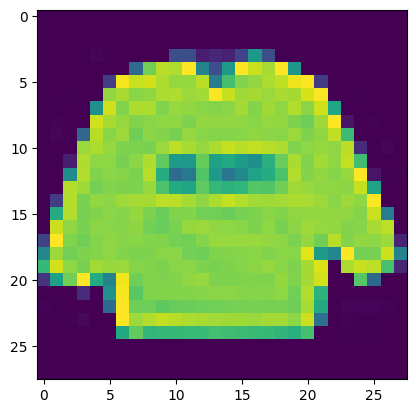

In [3]:
# Exclure 1ère colonne (labels)
X = np.array(observations_entrainement.iloc[:, 1:])

premiereImage = X[0]
premiereImage = premiereImage.reshape(LONGUEUR_IMAGE, LARGEUR_IMAGE)

plt.imshow(premiereImage)
plt.show()

In [4]:
# Création catégories
y = keras.utils.to_categorical(np.array(observations_entrainement.iloc[:,0]))

# Répartition données apprentissage/validation
# 80% apprentissage, 20% validation
X_apprentissage, X_validation, y_apprentissage, y_validation = train_test_split(X, y, test_size=0.2, random_state=13)

In [5]:
# Redimensionnement img 28*28, puis scaling
X_apprentissage = X_apprentissage.reshape(X_apprentissage.shape[0], LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)
X_apprentissage = X_apprentissage.astype('float32')
X_apprentissage /= 255

X_validation = X_validation.reshape(X_validation.shape[0], LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)
X_validation = X_validation.astype('float32')
X_validation /= 255

In [6]:
# Préparation données tests
observations_test = pnd.read_csv('datas/fashion-mnist_test.csv')
X_test = np.array(observations_test.iloc[:, 1:])
y_test = tf.keras.utils.to_categorical(np.array(observations_test.iloc[:,0]))
X_test = X_test.reshape(X_test.shape[0], LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)
X_test = X_test.astype('float32')
X_test /= 255

## CONFIGURATION

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D

# Dimensions img
dimentionImage = (LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)

# Réseau de neurones couche par couche
reseauNeurone1Convolution = Sequential()

# Ajout couche d'entrée
reseauNeurone1Convolution.add(Input(shape=dimentionImage))

"""
1- Ajout couche convolution comportant:
    - 32 filtres de taille 3x3 (Kernel) parcourant l'img
    - fonction d'activation ReLU (Rectified Linear Activation)
    - Img d'entrée 28px*28px
"""
reseauNeurone1Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

""" 2- Définition fonction pooling, fenêtre 2px*2px """
reseauNeurone1Convolution.add(MaxPooling2D(pool_size=(2, 2)))

""" 3- Fonction d'ignorance """
reseauNeurone1Convolution.add(Dropout(0.2))

""" 4- Transforme une seule ligne """
reseauNeurone1Convolution.add(Flatten())

""" 5- Réseau de neurones composé de 128 neurones, fonction d'activation ReLU """
reseauNeurone1Convolution.add(Dense(128, activation='relu'))

""" 6- Réseau de neurones composé de 10 neurones, fonction d'activation softmax """
reseauNeurone1Convolution.add(Dense(10, activation='softmax'))

## COMPILATION, APPRENTISSAGE ET TEST

In [8]:
reseauNeurone1Convolution.compile(loss=keras.losses.categorical_crossentropy,
                                  optimizer=tf.keras.optimizers.Adam(),
                                  metrics=['accuracy'])

In [9]:
historique_apprentissage = reseauNeurone1Convolution.fit(
    X_apprentissage, y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation)
)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8161 - loss: 0.5327 - val_accuracy: 0.8680 - val_loss: 0.3724
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8774 - loss: 0.3465 - val_accuracy: 0.8866 - val_loss: 0.3236
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8937 - loss: 0.3031 - val_accuracy: 0.8857 - val_loss: 0.3245
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9011 - loss: 0.2786 - val_accuracy: 0.8972 - val_loss: 0.2896
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9061 - loss: 0.2623 - val_accuracy: 0.9028 - val_loss: 0.2748
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9124 - loss: 0.2429 - val_accuracy: 0.9031 - val_loss: 0.2694
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9180 - loss: 0.2277 - val_accuracy: 0.9086 - val_loss: 0.2595
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9204 - loss: 0.2180 - val_accu

In [10]:
evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])

Erreur: 0.2426547408103943
Précision: 0.9151999950408936


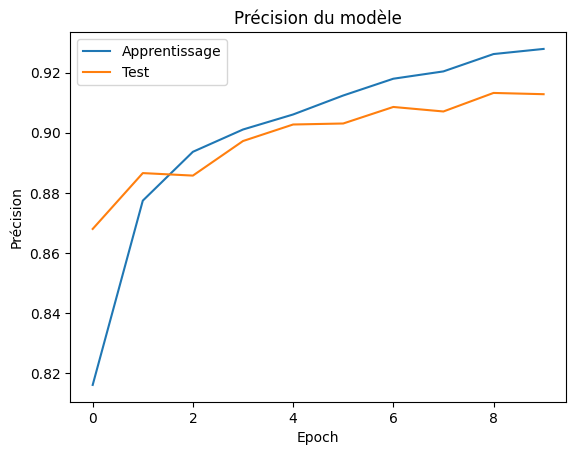

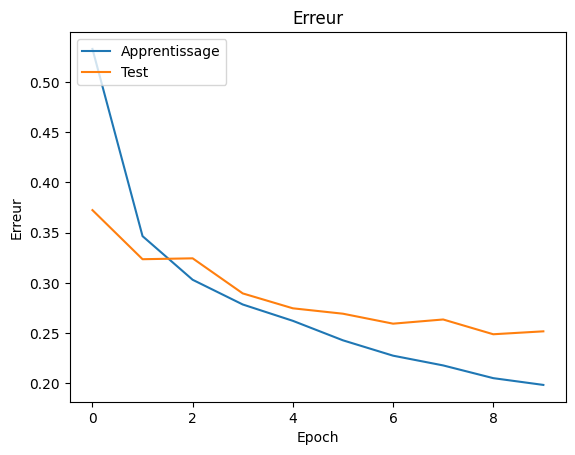

In [11]:
plt.plot(historique_apprentissage.history['accuracy'])
plt.plot(historique_apprentissage.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(historique_apprentissage.history['loss'])
plt.plot(historique_apprentissage.history['val_loss'])
plt.title('Erreur')
plt.ylabel('Erreur')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()

## AUGMENTATION NB DONNÉES

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generateur_images = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    shear_range=0.3,
    height_shift_range=0.08,
    zoom_range=0.08
)

In [13]:
# Générations nouvelles img
nouvelles_images_apprentissage = generateur_images.flow(X_apprentissage, y_apprentissage, batch_size=256)
nouvelles_images_validation = generateur_images.flow(X_validation, y_validation, batch_size=256)
historique_apprentissage = reseauNeurone1Convolution.fit(
    nouvelles_images_apprentissage,
    steps_per_epoch=48000//256,
    epochs=50,
    validation_data=nouvelles_images_validation,
    validation_steps=12000//256,
    verbose=1
)
evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.8285 - loss: 0.4624 - val_accuracy: 0.8489 - val_loss: 0.4092
Epoch 2/50
  1/187 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8594 - loss: 0.3478

/home/vscode/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8594 - loss: 0.3478 - val_accuracy: 0.8487 - val_loss: 0.4077
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.8496 - loss: 0.4050 - val_accuracy: 0.8532 - val_loss: 0.3909
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8477 - loss: 0.3856 - val_accuracy: 0.8505 - val_loss: 0.3914
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.8582 - loss: 0.3844 - val_accuracy: 0.8653 - val_loss: 0.3696
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8398 - loss: 0.4081 - val_accuracy: 0.8595 - val_loss: 0.3765
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.8626 - loss: 0.3710 - val_accuracy: 0.8656 - val_loss: 0.3600
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8867 - loss: 0.3405 - val_accuracy: 0.8642 - val_loss: 0.3563
Epoch 9/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.8679 - loss: 0.3595 - val_accuracy: 0.8651 - 

## SAUVEGARDE DU MODÈLE

In [14]:
# Sérialisation du modèle
model_json = reseauNeurone1Convolution.to_json()
with open("modele/modele.json", "w") as json_file:
    json_file.write(model_json)
    
# Sérialisation des poids
reseauNeurone1Convolution.save_weights("modele/modele.weights.h5")

print("Modèle sauvegardé!")

Modèle sauvegardé!
